# Importing Necessary Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data

In [2]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# Exploratory Data Analysis

In [3]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [4]:
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

# Collecting X and Y

In [5]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# Plot the Input Data

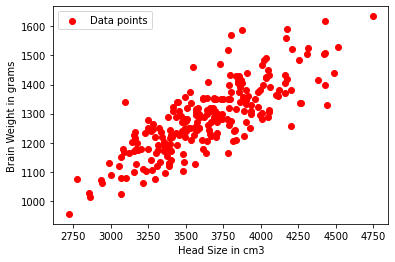

In [6]:
plt.scatter(X, Y, c='red', label='Data points')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# Calculating coefficient

In [7]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate m and c
num = 0
den = 0
for i in range(n):
  num += (X[i] - mean_x) * (Y[i] - mean_y)
  den += (X[i] - mean_x) ** 2
m = num / den
c = mean_y - (m * mean_x)

# Printing coefficients
print("coefficients for regression",m, c)

coefficients for regression 0.26342933948939945 325.57342104944223


In [8]:
y = c + m * X
y

array([1514.16660083, 1310.27229206, 1448.04583661, 1320.5460363 ,
       1425.9177721 , 1269.96760312, 1322.65347102, 1263.11844029,
       1277.34362462, 1374.5490509 , 1232.56063691, 1377.44677363,
       1284.45621679, 1434.08408162, 1335.03464997, 1346.62554091,
       1246.78582124, 1238.61951172, 1140.88722677, 1490.98481895,
       1347.15239959, 1391.40852862, 1327.65862847, 1302.89627056,
       1576.07249561, 1490.72138961, 1388.77423523, 1385.08622448,
       1235.45835965, 1425.39091342, 1323.1803297 , 1325.55119375,
       1406.42400097, 1421.70290266, 1420.91261465, 1330.29292186,
       1254.68870143, 1312.90658546, 1203.84683891, 1245.46867455,
       1369.28046411, 1248.89325596, 1462.27102095, 1327.65862847,
       1343.2009595 , 1388.24737655, 1460.42701557, 1159.32728053,
       1284.71964613, 1285.50993415, 1350.576981  , 1324.76090573,
       1450.41670067, 1395.88682739, 1382.45193108, 1236.512077  ,
       1350.31355166, 1423.02004936, 1362.16787194, 1292.09566

# Ploting 

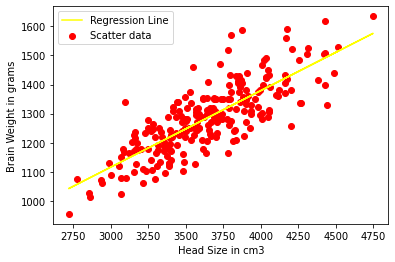

In [9]:
# Ploting Line
plt.plot(X, y, color='yellow', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='red', label='Scatter data')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# Calculating Root Mean Squares Error and R2 Score

In [10]:
rmse = 0
for i in range(n):
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print("Root Mean Square Error is",rmse)

Root Mean Square Error is 72.1206213783709


In [11]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score",r2)

R2 Score 0.6393117199570003


# Validation using Scikit Learn

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
X = X.reshape((n, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)

In [14]:
Y_pred = c + m * X
mse = mean_squared_error(Y, Y_pred)
r2_score = reg.score(X, Y)

In [15]:
print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
